In [110]:
#imports
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#math
from math import sqrt

In [111]:
#data
rawData = pd.read_csv('Credit_2.csv')
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [112]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [113]:
#dealing with non-numeric data- one-hot encoding
#converting all object variables to binary featues that one 0 and 1 classes 
rawData = pd.get_dummies(rawData)
print (rawData)


          ID  LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0          1      20000         1   24      2      2     -1     -1     -2   
1          2     120000         2   26     -1      2      0      0      0   
2          3      90000         2   34      0      0      0      0      0   
3          4      50000         1   37      0      0      0      0      0   
4          5      50000         1   57     -1      0     -1      0      0   
...      ...        ...       ...  ...    ...    ...    ...    ...    ...   
29995  29996     220000         1   39      0      0      0      0      0   
29996  29997     150000         2   43     -1     -1     -1     -1      0   
29997  29998      30000         2   37      4      3      2     -1      0   
29998  29999      80000         1   41      1     -1      0      0      0   
29999  30000      50000         1   46      0      0      0      0      0   

       PAY_6  ...  PAY_AMT5  PAY_AMT6  SEX_female  SEX_male  \
0         -2

In [114]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   MARRIAGE                                30000 non-null  int64
 3   AGE                                     30000 non-null  int64
 4   PAY_0                                   30000 non-null  int64
 5   PAY_2                                   30000 non-null  int64
 6   PAY_3                                   30000 non-null  int64
 7   PAY_4                                   30000 non-null  int64
 8   PAY_5                                   30000 non-null  int64
 9   PAY_6                                   30000 non-null  int64
 10  BILL_AMT1                               30000 non-null  int64
 11  BILL_AMT2      

In [115]:
#df = rawData.iloc[:,:-3]
#df.head()                

In [116]:
X=rawData[['MARRIAGE', 'AGE', 'SEX_female', 'SEX_male','EDUCATION_graduate school','EDUCATION_high school','EDUCATION_other','EDUCATION_university','default payment next month_not default','default payment next month_default']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_not default,default payment next month_default
0,1,24,1,0,0,0,0,1,0,1
1,2,26,1,0,0,0,0,1,0,1
2,2,34,1,0,0,0,0,1,1,0
3,1,37,1,0,0,0,0,1,1,0
4,1,57,0,1,0,0,0,1,1,0


In [117]:
#features
#X=df1
#print('Summary of feature sample')
#X.head()

In [118]:
## dependent variable
#what we are trying to predict - #of 
#where no defaults?
#how to incorporate default/non default into this 
y = df.loc[:,'LIMIT_BAL']
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state = 123)
#X_train.shape, X_test.shape

In [120]:
X_train_count = len(X_train.index)
print('The number of observations in the feature training set are:',str(X_train_count))
X_train.head(10)

The number of observations in the feature training set are: 21000


,MARRIAGE,AGE,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_not default,default payment next month_default
16395,2,36,1,0,1,0,0,0,1,0
21448,2,30,1,0,1,0,0,0,1,0
20034,1,44,1,0,0,1,0,0,1,0
25755,1,30,1,0,0,0,0,1,1,0
1438,2,54,0,1,0,0,0,1,1,0
13415,1,37,1,0,0,0,0,1,1,0
18011,2,37,0,1,0,0,0,1,1,0
27677,2,24,1,0,1,0,0,0,1,0
11628,1,56,0,1,0,0,0,1,1,0
27103,2,30,0,1,1,0,0,0,1,0


In [121]:
##why are # of observations the same 
y_train_count = len(y_train.index)
print('The number of observations in the y training set are:',str(y_train_count))
y_train.head()

The number of observations in the y training set are: 21000


16395    320000
21448    440000
20034    160000
25755    120000
1438      50000
Name: LIMIT_BAL, dtype: int64

In [122]:
# =[] creating empty list
#append is adding element to the list
#creating empty list and then adding the algos
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [123]:
#regression
results = []
names = []
for name, model in algosClass:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
 names.append(name)
 results.append(result)

In [124]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.17198956985730338
Linear Regression 0.1288949607095474
Support Vector Regression -0.05481839110777664


In [125]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)
print(cross_val_score(model, X_train, y_train)) 
model.score(X_train,y_train)

[0.16595854 0.16526428 0.15711106 0.16963316 0.17669724]


0.2588681094286682

In [126]:
#algo = LinearRegression()
#model = algo.fit(X_train,y_train)
#print(cross_val_score(model, X_train, y_train)) 
#model.score(X_train, y_train)

In [127]:
#algo = SVR()
#model = algo.fit(X_train,y_train)
#print(cross_val_score(model, X_train, y_train)) 
#model.score(X_train,y_train)

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [129]:
from math import sqrt

In [130]:
#using Random Forest Regressor - highest accruacy score
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.175
RMSE: 116849.852


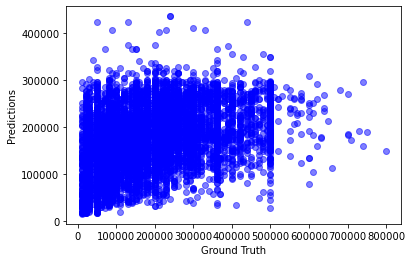

In [133]:
plt.scatter(y_test, predictions,color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();